<a href="https://colab.research.google.com/github/ND-CSE-30151/spring-2023/blob/master/notes/20-ntms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 20: Nondeterministic Turing machines

In [3]:
#@title Setup
!pip install -qqq tock
from tock import *
!test -x /content/theory || git clone --quiet https://github.com/ND-CSE-30151/spring-2023 /content/theory
%cd -q /content/theory/notes

## Nondeterminism

<div class="alert alert-info">
    <p><b>Read:</b>
    <ul><li>The definition of configuration (168–169) if you haven't already.</li>
        <li>The subsection "Nondeterministic Turing Machines" (178–180).</li>
    </ul></p>
</div>    

We can make Turing machines _nondeterministic_, similarly to how we made finite automata nondeterministic. We don't ever ask you to actually write a nondeterministic Turing machine, but the concept is extremely important.

Here's an example NTM that recognizes the language $\{ww \mid w \in \{\texttt{0}, \texttt{1}\}^\ast\}$:

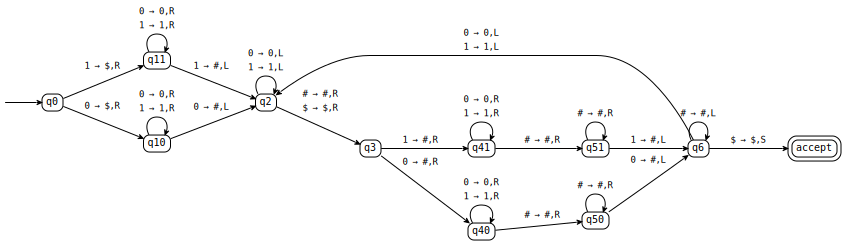

In [4]:
ntm = read_csv("ntm.csv")
ntm

The nondeterminism is in states q10 and q11, which allow the machine to nondeterministically guess where the midpoint of the string is. Here's a graph of all possible runs.

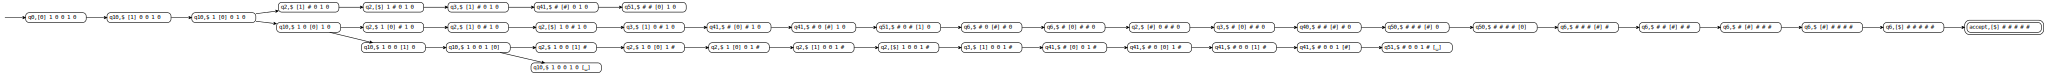

In [5]:
run(ntm, "0 1 0 0 1 0")

And here's the successful path.

In [6]:
run(ntm,"0 1 0 0 1 0").shortest_path()

q0,[0] 1 0 0 1 0
q10,$ [1] 0 0 1 0
q10,$ 1 [0] 0 1 0
q10,$ 1 0 [0] 1 0
q2,$ 1 [0] # 1 0
q2,$ [1] 0 # 1 0
q2,[$] 1 0 # 1 0
q3,$ [1] 0 # 1 0
q41,$ # [0] # 1 0
q41,$ # 0 [#] 1 0
q51,$ # 0 # [1] 0


A NTM accepts a string $w$ iff at least one branch of the computation accepts $w$; the other branches can reject or loop. If all branches reject or loop, the NTM rejects $w$.

Normally we assume that TMs are deterministic, but for the rest of this section, we'll call TMs "deterministic TMs" or DTMs for short, to make the contrast with NTMs clear.

Unlike DTMs, it's not obvious how you could build a physical NTM. But if you could, it would be useful for all kinds of very very practical things. For example, a Sudoku solver could just try all possible ways of filling in the puzzle and check them all in parallel. This would be (we think) so much faster than a DTM. That speed difference is the focus of Unit Four.

But, surprisingly, NTMs are equivalent to DTMs. The proof of Theorem 3.16 treats the computation as a tree of configurations; we saw an example of such a tree above. Each node is a configuration, and each edge is a step of the computation. 

The proof constructs a DTM that simulates the NTM by doing a breadth-first search (BFS) on this tree. Each node in the tree is given an address (known as a Gorn address), which is stored on tape 3. The proof is a little bit unclear on one point: Stage 4 just says "Replace the string on tape 3 with the next string in the string ordering," but doesn't explain what the ordering is -- it's the order defined on page 14, which causes the addresses to be listed in breadth-first order.

But here's an alternative proof, which a student in a previous class came up with. It, too, performs a BFS on configurations, but, as you may recall from *Data Structures*, we can implement BFS using a queue, and a tape works very well as a queue. Given a NTM $N$ with start state $s$, construct a (single-tape, deterministic) TM $M =$ "On input $w$:

1. Initialize the tape to the start configuration $\texttt{#}sw\texttt{#}$ and move the head to the left end of the tape.
2. Read the configuration $C$ under the head.
3. If $C$ is an accepting configuration, *accept*.
4. For every configuration $C'$ that $C$ can yield (according to the rules of $N$), append $C'\texttt{#}$ to the right.
5. Erase configuration $C$ and move the head to the next configuration on the tape.
6. If there is no next configuration, *reject*.
7. Goto 2.

This is what the tape might look like after step 4:

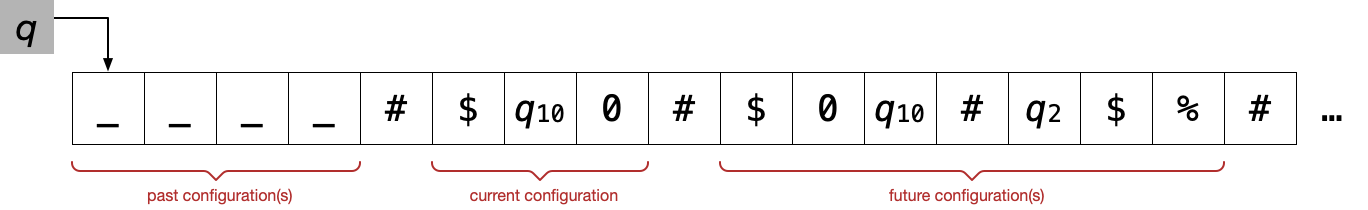